In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Wedge, Circle
import geopandas as gpd
from shapely.geometry import Point
import datetime
import glob

In [2]:
import xarray as xr

for i in range(1, 31):
    filename = f"/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub{i:02d}.nc"
    ds = xr.open_dataset(filename)
    print(f"{filename}: {ds.perc.values.shape}")

/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub01.nc: (3, 88, 373)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub02.nc: (3, 88, 373)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub03.nc: (3, 88, 375)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub04.nc: (3, 88, 373)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub05.nc: (3, 88, 373)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub06.nc: (3, 88, 375)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub07.nc: (3, 88, 373)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub08.nc: (3, 88, 373)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub09.nc: (3, 88, 375)
/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub10.nc: (3, 88, 373)
/N/project

In [5]:
files = sorted(glob.glob("/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub*.nc"))
assert len(files) == 30, f"Expected 30 files, but got {len(files)}"

files_grid = np.array(files).reshape(10, 3)

final_arr = np.full((3, 881, 1121), np.nan)

lat_offset = 0 
for i in range(10): 
    ds_tile0 = xr.open_dataset(files_grid[i, 0])
    tile_height = ds_tile0.perc.values.shape[1]
    
    lon_offset = 0  
    for j in range(3):  
        ds_tile = xr.open_dataset(files_grid[i, j])
        tile = ds_tile.perc.values  
        tile_width = tile.shape[2]

        final_arr[:, lat_offset:lat_offset + tile_height, lon_offset:lon_offset + tile_width] = tile
        lon_offset += tile_width  
    lat_offset += tile_height 

print("final shape:", final_arr.shape)

final shape: (3, 881, 1121)


In [9]:
ds_ref1 = xr.open_dataset('/N/project/Zli_lab/gongg/stage4_data/stage4_daily/20210617.nc')
ds_ref2 = xr.open_dataset('/N/project/Zli_lab/gongg/stage4_data/stage4_missing_percentage/missing_perc_sub25.nc')

In [14]:
ds_mis = xr.Dataset({'p': (['time', 'lat', 'lon'], 1-final_arr)},
        coords={'lon': (['lat', 'lon'], ds_ref1.lon.values),
                'lat': (['lat', 'lon'], ds_ref1.lat.values), 
                'time': ('time', ds_ref2.time_period.values)})

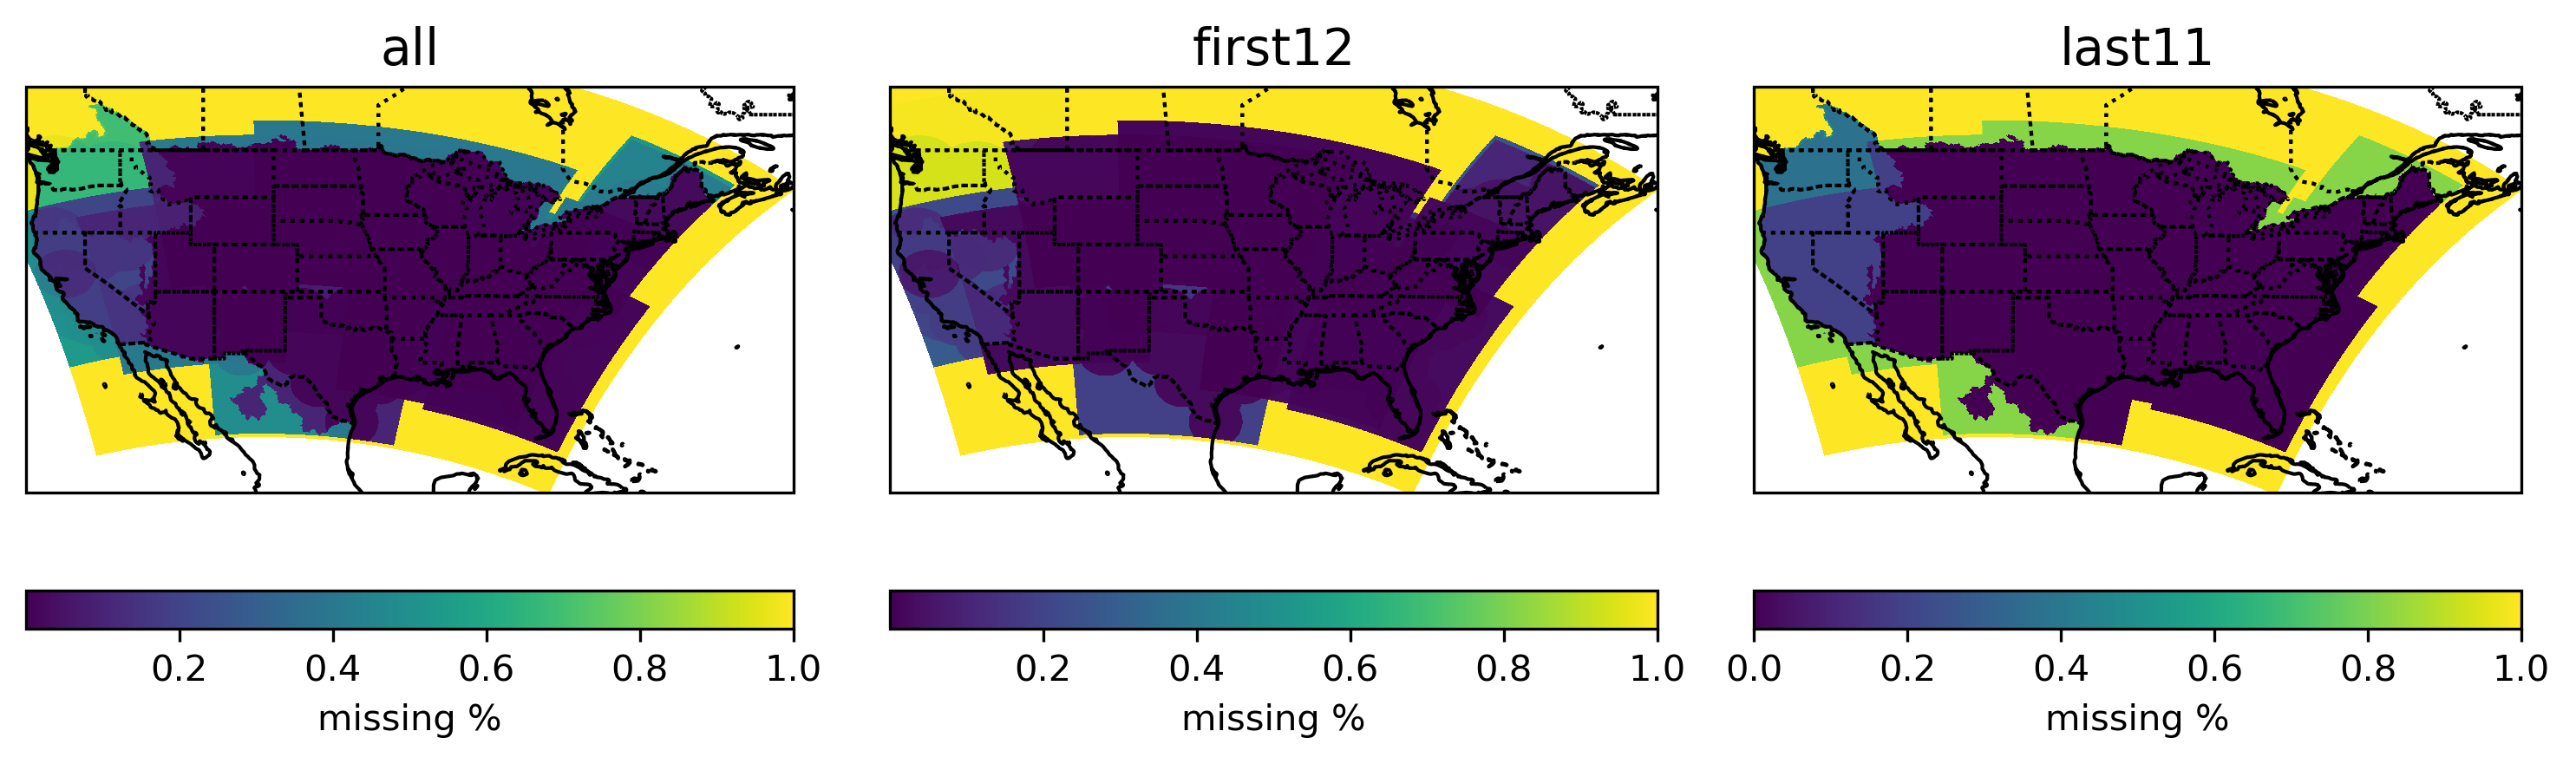

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)
time_periods = ds_mis.time.values

for i, ax in enumerate(axs):
    im = ax.pcolormesh(ds_mis.lon, ds_mis.lat, ds_mis.p.isel(time=i), cmap='viridis', shading='auto')
    ax.set_title(f'{time_periods[i]}', fontsize=14)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    ax.set_extent([-125, -60, 20, 50])  # 根据数据调整经纬度范围
    plt.colorbar(im, ax=ax, orientation='horizontal', label='missing %')

plt.tight_layout()
plt.show()